In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 对网络 G 进行可视化
def plot_graph(G):
  fig, ax = plt.subplots(figsize = (12, 8))
  # plt.figure()
  pos = nx.spring_layout(G)
  edges = G.edges()
  # nx.draw_networkx(G, pos, edges = edges)
  nx.draw_networkx_nodes(G, pos, nodelist = G.nodes(), node_size = 300, node_color = 'r', alpha = 0.8)
  nx.draw_networkx_edges(G, pos, edgelist = edges, alpha = 0.4)
  nx.draw_networkx_labels(G, pos, font_size = 10, ax = ax)
  plt.show()

In [3]:
path = '/Volumes/Library/SynologyDrive/data/AI_Cheats/'

In [4]:
# 数据加载，构造图
G = nx.read_gml(path + '/LPA/football.gml')
print(G)
print(type(G))

Graph with 115 nodes and 613 edges
<class 'networkx.classes.graph.Graph'>


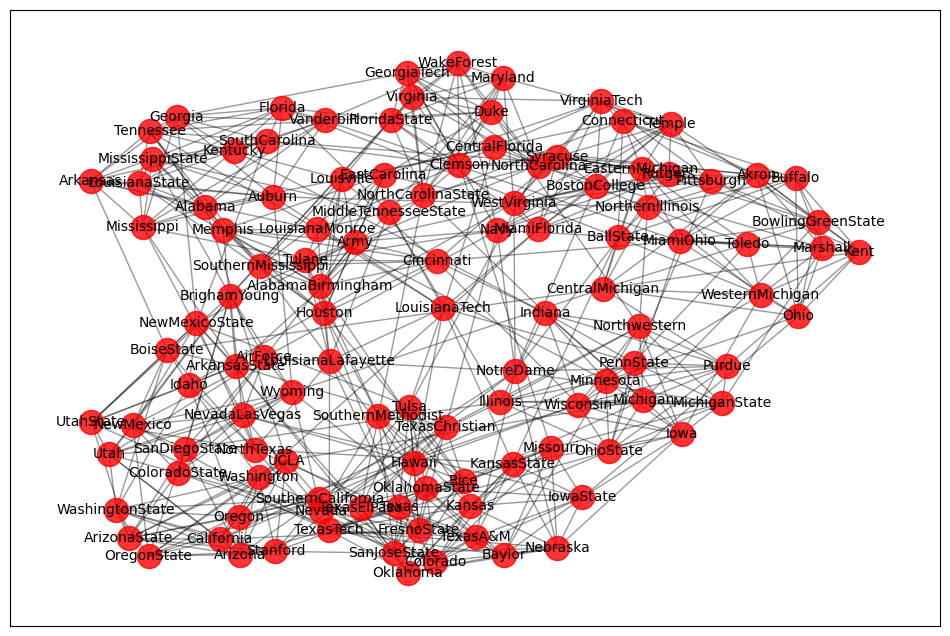

['BrighamYoung', 'FloridaState', 'Iowa', 'KansasState', 'NewMexico', 'TexasTech', 'PennState', 'SouthernCalifornia', 'ArizonaState', 'SanDiegoState', 'Baylor', 'NorthTexas', 'NorthernIllinois', 'Northwestern', 'WesternMichigan', 'Wisconsin', 'Wyoming', 'Auburn', 'Akron', 'VirginiaTech', 'Alabama', 'UCLA', 'Arizona', 'Utah', 'ArkansasState', 'NorthCarolinaState', 'BallState', 'Florida', 'BoiseState', 'BostonCollege', 'WestVirginia', 'BowlingGreenState', 'Michigan', 'Virginia', 'Buffalo', 'Syracuse', 'CentralFlorida', 'GeorgiaTech', 'CentralMichigan', 'Purdue', 'Colorado', 'ColoradoState', 'Connecticut', 'EasternMichigan', 'EastCarolina', 'Duke', 'FresnoState', 'OhioState', 'Houston', 'Rice', 'Idaho', 'Washington', 'Kansas', 'SouthernMethodist', 'Kent', 'Pittsburgh', 'Kentucky', 'Louisville', 'LouisianaTech', 'LouisianaMonroe', 'Minnesota', 'MiamiOhio', 'Vanderbilt', 'MiddleTennesseeState', 'Illinois', 'MississippiState', 'Memphis', 'Nevada', 'Oregon', 'NewMexicoState', 'SouthCarolina', 

In [5]:
# 可视化
plot_graph(G)
print(list(G.nodes()))
print(G.nodes['BrighamYoung']['value'])

In [6]:
# 构建 GCN，计算 A_hat 和 D_hat 矩阵
# 按照字母顺序排序
order = sorted(list(G.nodes()))
print(order)

# 邻接矩阵
A = nx.to_numpy_array(G, nodelist = order)
print(A)

['AirForce', 'Akron', 'Alabama', 'AlabamaBirmingham', 'Arizona', 'ArizonaState', 'Arkansas', 'ArkansasState', 'Army', 'Auburn', 'BallState', 'Baylor', 'BoiseState', 'BostonCollege', 'BowlingGreenState', 'BrighamYoung', 'Buffalo', 'California', 'CentralFlorida', 'CentralMichigan', 'Cincinnati', 'Clemson', 'Colorado', 'ColoradoState', 'Connecticut', 'Duke', 'EastCarolina', 'EasternMichigan', 'Florida', 'FloridaState', 'FresnoState', 'Georgia', 'GeorgiaTech', 'Hawaii', 'Houston', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'IowaState', 'Kansas', 'KansasState', 'Kent', 'Kentucky', 'LouisianaLafayette', 'LouisianaMonroe', 'LouisianaState', 'LouisianaTech', 'Louisville', 'Marshall', 'Maryland', 'Memphis', 'MiamiFlorida', 'MiamiOhio', 'Michigan', 'MichiganState', 'MiddleTennesseeState', 'Minnesota', 'Mississippi', 'MississippiState', 'Missouri', 'Navy', 'Nebraska', 'Nevada', 'NevadaLasVegas', 'NewMexico', 'NewMexicoState', 'NorthCarolina', 'NorthCarolinaState', 'NorthTexas', 'NorthernIllinois', '

In [7]:
# 生成对角矩阵
I = np.eye(G.number_of_nodes())
print(I)
A_hat = A + I
print(A_hat)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]]


In [8]:
# D_hat 为 A_hat 的度矩阵
D_hat = np.sum(A_hat, axis=0)
print('D_hat: \n', D_hat)

D_hat: 
 [11. 12. 12. 11. 12. 12. 11. 11. 12. 12. 11. 11. 10. 12. 12. 13. 12. 12.
  9. 12. 12. 11. 12. 11.  8. 12. 12. 12. 12. 13. 12. 11. 12. 12. 12. 10.
 12. 12. 13. 12. 11. 13. 11. 11.  9.  9. 11. 11. 11. 11. 12. 12. 11. 12.
 12. 12. 10. 12. 12. 12. 11. 12. 12. 13. 13. 12. 12. 12. 12. 11. 11. 12.
 12. 11. 12. 12. 11. 12. 11. 13. 12. 12. 12. 11. 12. 12. 12. 13. 13. 11.
 12. 12. 12. 12. 12. 12. 12. 12. 13. 10. 12. 13. 12. 12. 10. 12. 11. 12.
 11. 12. 12. 12. 11. 13. 12.]


In [9]:
# 得到对角线上的元素
D_hat = np.matrix(np.diag(D_hat))
print('D_hat: \n', D_hat)

D_hat: 
 [[11.  0.  0. ...  0.  0.  0.]
 [ 0. 12.  0. ...  0.  0.  0.]
 [ 0.  0. 12. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 11.  0.  0.]
 [ 0.  0.  0. ...  0. 13.  0.]
 [ 0.  0.  0. ...  0.  0. 12.]]


In [10]:
# 初始化权重，normal 正太分布 loc 均值，scale 标准差
# 第一层神经元， 4 个维度
W_1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 4))

# 第二层神经元，4 => 2
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2))
print('W_1: \n', W_1)
print('W_2: \n', W_2)

W_1: 
 [[ 1.07800887e+00  1.52933320e+00  6.62504102e-01  4.69781625e-01]
 [ 1.59304035e+00 -9.05400624e-02  5.69529340e-01 -4.36238411e-01]
 [-5.27277365e-01  2.25953888e-01 -1.69708483e+00 -1.95132619e+00]
 [-1.73385112e+00  6.10621580e-01 -1.82796301e+00 -1.25964399e+00]
 [-1.87297998e+00  1.10638945e+00 -1.22060231e+00 -2.71154687e-01]
 [ 1.00529511e+00  3.39231619e-01  1.98901706e-01  3.94970794e-01]
 [-1.07439805e+00 -3.40425788e-01 -7.83891122e-02 -1.50504659e+00]
 [ 3.78800958e-01  1.20146292e+00 -7.33582865e-01 -4.34087250e-01]
 [-6.36314829e-01 -1.51931510e+00  1.23987034e-01 -1.43881909e+00]
 [-1.09499777e+00 -1.00243322e+00  9.40228713e-01 -1.38213212e-01]
 [-4.40799448e-02  6.84706799e-01 -4.14588799e-01  9.54206997e-01]
 [ 3.84069357e-02 -3.24362270e-01 -1.26542159e+00 -9.99746238e-01]
 [ 4.56172970e-01  1.51114857e+00 -2.67560197e-01 -4.07835782e-02]
 [-4.34017707e-01 -9.68000776e-01  5.44893655e-01 -1.21569078e+00]
 [ 3.13497010e-01 -1.30917803e-01 -4.37052001e-01  6.11

In [11]:
# 当 x<0 时，结果 = 0，x >= 0 时，结果 = x
def relu(x):
  return (abs(x)+x) / 2

In [12]:
# 叠加 GCN 层，这里只使用单位矩阵作为特征表征，即每个节点被表示为一

def gcn_layer(A_hat, D_hat, X, W):
  return relu(D_hat**-1 * A_hat * X * W)

H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print('output: \n', output)

output: 
 [[2.10882999e-01 6.32011228e-01]
 [4.20973900e-01 0.00000000e+00]
 [0.00000000e+00 7.75789967e-03]
 [4.36365264e-03 0.00000000e+00]
 [1.48924645e-02 2.60010056e-01]
 [1.17229674e-01 2.65950533e-01]
 [0.00000000e+00 1.35151350e-01]
 [6.63983493e-03 2.32752503e-01]
 [1.67936762e-02 1.37986392e-02]
 [0.00000000e+00 1.47008985e-01]
 [1.29017165e-01 4.57387822e-02]
 [1.08166679e-01 0.00000000e+00]
 [3.68041998e-02 3.95243451e-01]
 [8.63746552e-02 0.00000000e+00]
 [2.80453538e-01 0.00000000e+00]
 [2.77025565e-01 5.53249569e-01]
 [3.06740275e-01 0.00000000e+00]
 [0.00000000e+00 1.65638334e-01]
 [1.78141856e-01 0.00000000e+00]
 [1.20776000e-01 7.69691920e-02]
 [9.70551292e-02 1.03998420e-01]
 [5.35299709e-01 0.00000000e+00]
 [1.17475771e-01 2.10030488e-01]
 [1.76301616e-01 6.86965152e-01]
 [3.70614791e-02 5.08769834e-02]
 [4.58526329e-01 0.00000000e+00]
 [1.67908640e-01 0.00000000e+00]
 [1.93111479e-01 0.00000000e+00]
 [0.00000000e+00 5.46562042e-02]
 [4.36077724e-01 2.97743080e-02]


In [13]:
# 提取特征表征
feature_representations = {}
nodes = list(G.nodes())
for i in range(len(nodes)):
  feature_representations[nodes[i]] = np.array(output)[i]
print('feature_representations: \n', feature_representations)

feature_representations: 
 {'BrighamYoung': array([0.210883  , 0.63201123]), 'FloridaState': array([0.4209739, 0.       ]), 'Iowa': array([0.       , 0.0077579]), 'KansasState': array([0.00436365, 0.        ]), 'NewMexico': array([0.01489246, 0.26001006]), 'TexasTech': array([0.11722967, 0.26595053]), 'PennState': array([0.        , 0.13515135]), 'SouthernCalifornia': array([0.00663983, 0.2327525 ]), 'ArizonaState': array([0.01679368, 0.01379864]), 'SanDiegoState': array([0.        , 0.14700899]), 'Baylor': array([0.12901716, 0.04573878]), 'NorthTexas': array([0.10816668, 0.        ]), 'NorthernIllinois': array([0.0368042 , 0.39524345]), 'Northwestern': array([0.08637466, 0.        ]), 'WesternMichigan': array([0.28045354, 0.        ]), 'Wisconsin': array([0.27702557, 0.55324957]), 'Wyoming': array([0.30674027, 0.        ]), 'Auburn': array([0.        , 0.16563833]), 'Akron': array([0.17814186, 0.        ]), 'VirginiaTech': array([0.120776  , 0.07696919]), 'Alabama': array([0.09705513,

In [14]:
# 不同节点 value, 绘制不同的颜色
def getValue(value):
  colorList = ['blue','green','purple','yellow','red','pink','orange','black','white','gray','brown','wheat']
  return colorList[int(value)]

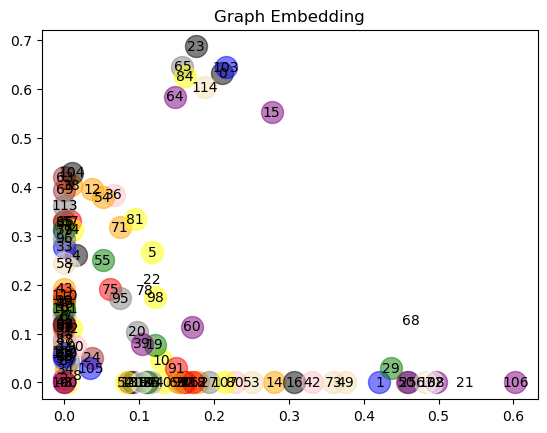

In [15]:
# 绘制 output，节点 GCN Embedding 可视化
def plot_node(output, title):
  for i in range(len(nodes)):
    node_name = nodes[i]
    value = G.nodes[node_name]['value']
    plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,label=str(i), color=getValue(value), alpha=0.5, s=250)
    plt.text(np.array(output)[i,0],np.array(output)[i,1] ,i, horizontalalignment='center',verticalalignment='center', fontdict={'color':'black'})
  plt.title(title)
  plt.show()

plot_node(output, 'Graph Embedding')

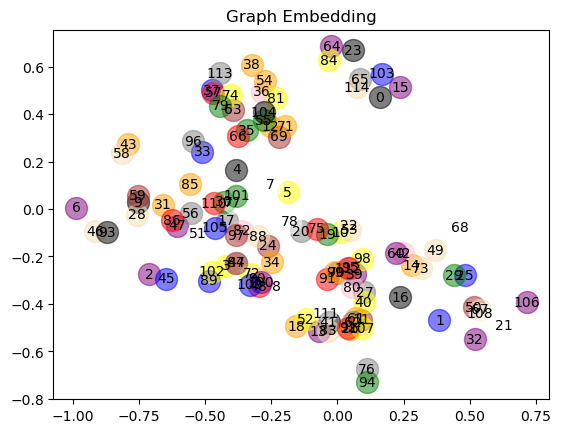

In [16]:
# 尝试去掉激活函数 relu, 重新运行一遍，效果可能会更好
def gcn_layer2(A_hat, D_hat, X, W):
  return D_hat**-1 * A_hat * X * W

H_3 = gcn_layer2(A_hat, D_hat, I, W_1)
H_4 = gcn_layer2(A_hat, D_hat, H_3, W_2)
output2 = H_4
plot_node(output2, 'Graph Embedding')